In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack, csr_matrix
from sklearn.ensemble import GradientBoostingClassifier
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv(r"C:\Users\lbhar\Downloads\spam.csv")

In [3]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphabetic characters (numbers and punctuations)
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [4]:
# Apply preprocessing
df["cleaned_message"] = df["Message"].apply(preprocess_text)

# Check the cleaned data
print(df.head())

  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


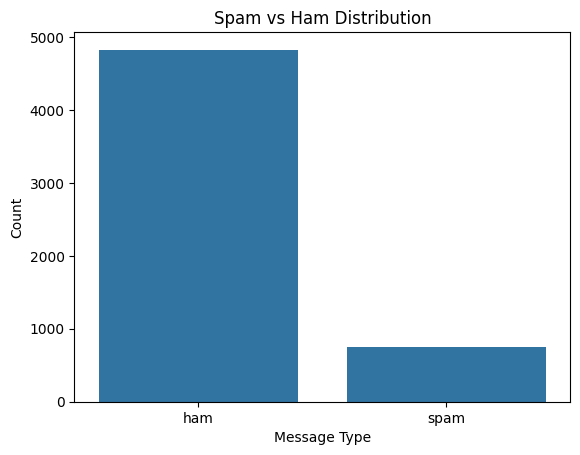

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Category')
plt.title('Spam vs Ham Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# feature extraction using tf-idf

In [24]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Convert the cleaned messages into a feature matrix
X = tfidf_vectorizer.fit_transform(df["cleaned_message"]).toarray()

# Check the feature matrix
print(X.shape)


(5572, 5000)


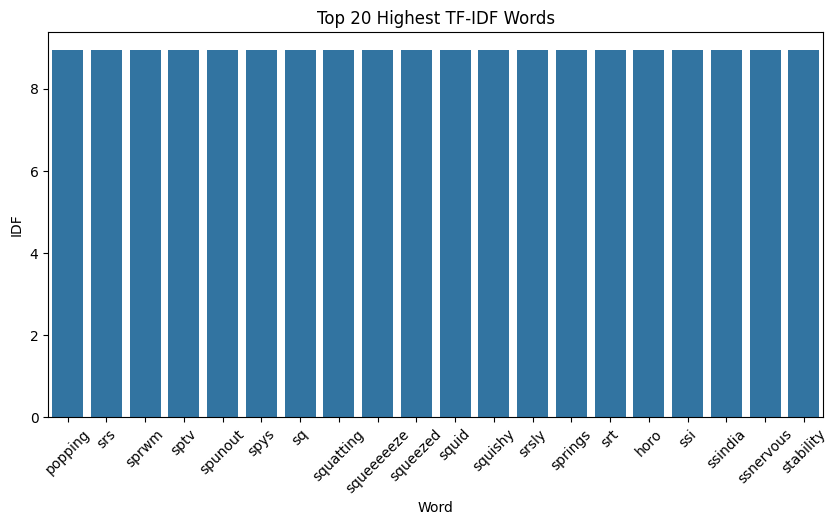

In [25]:
# Assuming tfidf_vectorizer is your fitted TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
idf_scores = tfidf_vectorizer.idf_

# Create DataFrame for visualization
import pandas as pd
idf_df = pd.DataFrame({'Word': feature_names, 'IDF': idf_scores})
idf_df = idf_df.sort_values(by='IDF', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='IDF', data=idf_df)
plt.xticks(rotation=45)
plt.title('Top 20 Highest TF-IDF Words')
plt.show()


# n-grams

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using bigrams (2-grams)
tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit the vectorizer to the cleaned messages
X_bigrams = tfidf_vectorizer_bigrams.fit_transform(df["cleaned_message"]).toarray()
print(X_bigrams.shape)

(5572, 5000)


In [29]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# word to vector

In [71]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the messages
df['tokens'] = df['cleaned_message'].apply(word_tokenize)

# Train the Word2Vec model
word2vec_model = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get the vector for a sample word
vector = word2vec_model.wv['spam']

# Output: Vector for the word 'spam'
print(vector)

[ 0.00601608  0.01258828 -0.00586443  0.00892082  0.01002764 -0.02400183
 -0.00065295  0.01909105 -0.01222153 -0.01108153 -0.0028992  -0.0040044
 -0.00239026 -0.0006483   0.00366106 -0.00223138  0.00938544 -0.00327552
  0.00799927 -0.01633416  0.00408982  0.00777983  0.00819113 -0.00028854
  0.00436605 -0.00561288 -0.0022974  -0.01304496 -0.002243    0.00921872
  0.01665439  0.00877801  0.00212567 -0.01381976 -0.00742668  0.01667848
  0.01013494 -0.00202174 -0.00521154 -0.00370233  0.00055214 -0.00186367
 -0.00047471  0.00041264  0.00680984 -0.00636478 -0.00400756 -0.00168619
  0.00060172  0.0069327  -0.00508326  0.00264058 -0.00520655 -0.00567744
  0.00422628  0.01407448  0.00992255 -0.00487512 -0.01003492  0.00024737
  0.00608285  0.0036621   0.01056885 -0.00795498 -0.00837902  0.02077088
  0.00616075  0.01522254 -0.00192344  0.00447604 -0.01261906  0.00047561
  0.01708842 -0.00388637  0.00599498  0.00374316 -0.00644341 -0.00717831
 -0.01459158 -0.0030755  -0.0111877   0.00070367 -0.

# target variable

In [35]:
# Encode the target variable (spam = 1, ham = 0)
y = df["Category"].apply(lambda x: 1 if x == "spam" else 0)


In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# sentiment analysis

In [39]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [40]:
from textblob import TextBlob

# Sentiment polarity: -1 (negative) to 1 (positive)
df['sentiment'] = df['cleaned_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Output: Sentiment values for the first 5 messages
print(df[['cleaned_message', 'sentiment']].head())


                                     cleaned_message  sentiment
0  go jurong point crazy available bugis n great ...        0.2
1                            ok lar joking wif u oni        0.5
2  free entry wkly comp win fa cup final tkts st ...        0.4
3                u dun say early hor u c already say        0.1
4        nah dont think goes usf lives around though        0.0


In [41]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.5:
        return 1  # Positive sentiment
    elif polarity < -0.5:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply sentiment analysis to the 'cleaned_message' column
df['sentiment'] = df['cleaned_message'].apply(sentiment_label)

# Now, sentiment_feature should be the sentiment values (as a sparse matrix or array)
sentiment_feature = df['sentiment'].values.reshape(-1, 1)


In [42]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Tokenize and POS tagging
df['pos_tags'] = df['cleaned_message'].apply(lambda x: pos_tag(word_tokenize(x)))

# Example: Extracting the count of nouns, verbs, etc.
def extract_pos_features(pos_tags):
    pos_counts = {
        'NN': 0, 'VB': 0, 'JJ': 0  # Noun, Verb, Adjective counts
    }
    for word, tag in pos_tags:
        if tag.startswith('NN'):
            pos_counts['NN'] += 1
        elif tag.startswith('VB'):
            pos_counts['VB'] += 1
        elif tag.startswith('JJ'):
            pos_counts['JJ'] += 1
    return list(pos_counts.values())

# Apply POS feature extraction
pos_features_df = pd.DataFrame(df['pos_tags'].apply(extract_pos_features).tolist(), columns=['NN', 'VB', 'JJ'])


In [44]:
# Reshape sentiment_feature to be a column vector (5572, 1)
sentiment_feature = df['sentiment'].values.reshape(-1, 1)


In [45]:
# Ensure pos_features_df is a DataFrame (which it should be)
pos_features_df = pd.DataFrame(df['pos_tags'].apply(extract_pos_features).tolist(), columns=['NN', 'VB', 'JJ'])


In [46]:
from scipy.sparse import csr_matrix

# Reshape sentiment_feature to a column vector and convert it to a sparse matrix
sentiment_feature_sparse = csr_matrix(df['sentiment'].values.reshape(-1, 1))

# Assuming pos_features_df is already in the correct shape (2D array or DataFrame)
# Convert pos_features_df to a sparse matrix
pos_features_sparse = csr_matrix(pos_features_df.values)


In [47]:
from scipy.sparse import hstack

# Assuming X is your TF-IDF or other sparse matrix features
X_combined = hstack([X, sentiment_feature_sparse, pos_features_sparse])

# Now you can use X_combined to train your model
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_combined, df['Category'])  # Replace 'Category' with the target variable


GradientBoostingClassifier(random_state=42)

In [48]:
import re

# Example of preprocessing: remove non-alphanumeric characters and convert to lowercase
df['cleaned_message'] = df['Message'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', str(x)).lower())

# Verify the dataframe to ensure cleaned message is created
print(df.head())


  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                              tokens  sentiment  \
0  [go, jurong, point, crazy, available, bugis, n...          0   
1                     [ok, lar, joking, wif, u, oni]          0   
2  [free, entry, wkly, comp, win, fa, cup, final,...          0   
3   

In [49]:
from textblob import TextBlob

# Compute sentiment polarity: -1 (negative) to 1 (positive)
df['sentiment'] = df['cleaned_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the dataframe with sentiment scores
print(df.head())


  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                              tokens  sentiment  \
0  [go, jurong, point, crazy, available, bugis, n...       0.15   
1                     [ok, lar, joking, wif, u, oni]       0.50   
2  [free, entry, wkly, comp, win, fa, cup, final,...       0.30   
3   

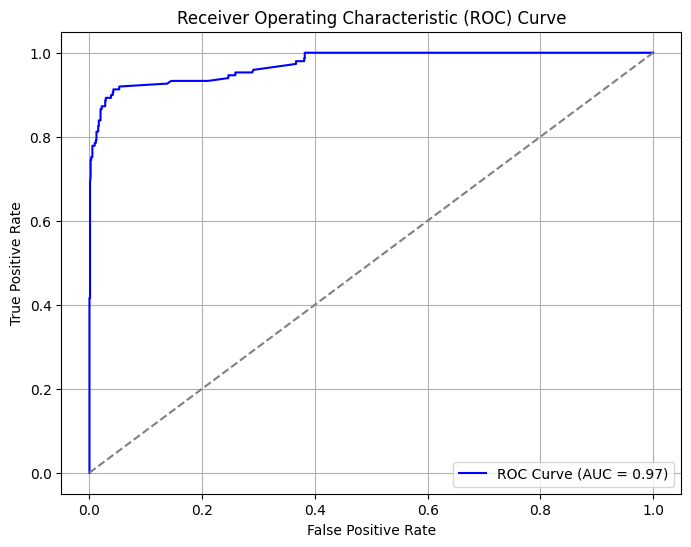

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# 1. Convert labels to binary if they are 'spam'/'ham'
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# 2. Get predicted probabilities (important: use predict_proba, not predict)
y_prob = model.predict_proba(X_test)[:, 1]

# 3. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


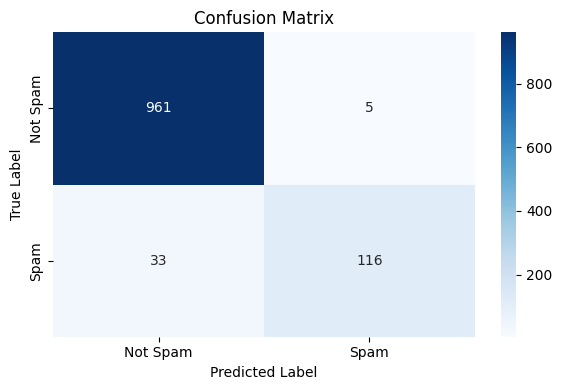

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam", "Spam"], 
            yticklabels=["Not Spam", "Spam"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X_combined' is your combined feature matrix (e.g., TF-IDF, sentiment, POS features, etc.)
# 'y' is the target variable (Category: ham or spam)
X = X_combined  # Your combined feature matrix (TF-IDF + Sentiment + other features)
y = df['Category'].map({'ham': 0, 'spam': 1})  # Encode labels as 0 and 1 (ham: 0, spam: 1)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any classifier, here using GradientBoostingClassifier)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 96.59%


In [ ]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
